In [741]:
import random
import numpy as np
def aLAP(P, maximize=True):
    if not maximize:
        P=-P
    n = P.shape[0]
    M = np.zeros((n,n))
    U = copy(P)
    C = np.zeros((n,n))
    #R = np.zeros((n,n))
    def try_match(a, b):
        nonlocal n, M, U, C, n_init
        i, j = np.nonzero(U) 
        n_init += 1
        a_free = (M[a,:] == 0).all()
        b_free = (M[b,:] == 0).all()
        a_matched = (M[a,:] != 0).any()
        b_matched = (M[b,:] != 0).any()
        while (M[a,:] == 0).all() and (M[b,:] == 0).all() and \
                (np.count_nonzero(i == a) > 1 or np.count_nonzero(i == b) > 1):
            if (M[a,:] == 0).all() and (np.count_nonzero(i == a) > 1):
                c_ind = np.nonzero(i == a) #indices of vertices adjacent to a
                for c in j[c_ind]: # first vertex not b, assigning to c
                    if c != b:
                        if U[a,c] > U[a,b]: # checking edge weight
                            C[[a,b],[b,a]] = U[[a,b],[b,a]] # moving {a,b} from U to C
                            U[[a,b],[b,a]] = 0
                            i, j = np.nonzero(U)
                            try_match(a, c)
                            break
                        else:
                            C[[a,c],[c,a]] = U[[a,c],[c,a]] # moving {a,c} from U to C
                            U[[a,c],[c,a]] = 0
                            i, j = np.nonzero(U)
                            
            if (M[b,:] == 0).all() and (np.count_nonzero(i == b) > 1):
                d_ind = np.nonzero(i == b)
                for d in j[d_ind]:
                    if d != a:
                        if U[b,d] > U[a,b]:
                            C[[a,b],[b,a]] = U[[a,b],[b,a]] # moving {a,b} from U to C
                            U[[a,b],[b,a]] = 0
                            try_match(b,d)
                            break
                        else:
                            C[[b,d],[d,b]] = U[[b,d],[d,b]] # moving {a,c} from U to C
                            U[[b,d],[d,b]] = 0
                            i, j = np.nonzero(U)
                            
            i, j = np.nonzero(U) #reset i,j
        '''
        if (M[a,:] != 0).any() and (M[b,:] != 0).any():
            C[a,:] = 0
            C[:,a] = 0
            C[b,:] = 0
            C[:,b] = 0
            n_init += 1
            
        elif (M[a,:] != 0).any() and (M[b,:] == 0).all(): #if a is matched, b free
            #R[np.nonzero(C_a)] = C_a[np.nonzero(C_a)]
            C[a,:] = 0
            C[:,a] = 0
            ic, jc = np.nonzero(C)
            d_ind = np.nonzero(ic == b)
            for d in jc[d_ind]:
                if (M[d,:] == 0).all():
                    U[[b,d],[d,b]] = C[[b,d],[d,b]]
                    i, j = np.nonzero(U)
        
                C[[b,d],[d,b]] = 0
                    
            n_init += 1
        
        elif (M[a,:] == 0).all() and (M[b,:] != 0).any(): #if b matched, a free
            #R[np.nonzero(C_b)] = C_b[np.nonzero(C_b)]
            C[b,:] = 0
            C[:,b] = 0
            ic, jc = np.nonzero(C)
            c_ind = np.nonzero(ic == a)
            for c in jc[c_ind]:
                if (M[c,:] == 0).all():
                    U[[a,c],[c,a]] = C[[a,c],[c,a]]
                    i, j = np.nonzero(U)
                C[[a,c],[c,a]] = 0
            n_init += 1
        '''
        if (M[a,:] == 0).all() and (M[b,:] == 0).all():
            #R[np.nonzero(C_a)] = C_a[np.nonzero(C_a)]
            #R[np.nonzero(C_b)] = C_b[np.nonzero(C_b)]
            C[[a,b],[b,a]] = 0
            
            if (np.count_nonzero(i == a) == 1) and (np.count_nonzero(i == b) == 1):
                U[[a,b],[b,a]] = 0
            i, j = np.nonzero(U) #reset i,j
            M[[a,b],[b,a]] = 1
                    
            
    n_init = 0
    while (U != 0).any():
        i, j = np.nonzero(U)
        index = random.randrange(len(i))
        #index = 0
        a = i[index]
        b = j[index]
        try_match(a, b)
        
        
    #print("time try_match called: " ,n_init)
    return np.nonzero(M)
        

        
        

In [1479]:
def aLAP_ali(cost_matrix, maximize =True):
    if not maximize:
        cost_matrix=-cost_matrix

        
    n = cost_matrix.shape[0]
    M = np.zeros((n,n))
    U = cost_matrix.astype(float)

    while (~np.isnan(U)).any():
        a, b = np.unravel_index(np.nanargmax(U), (n,n))
        U[a,:] = np.nan
        U[:,b] = np.nan
        M[a, b] = 1

    
    return np.nonzero(M)

In [287]:
def aLAP_ali(cost_matrix, maximize =True):
    if not maximize:
        cost_matrix=-cost_matrix
    n = cost_matrix.shape[0]
    M = csr_matrix(np.zeros((n,n)))
    U = csr_matrix(cost_matrix)
    while :
        a, b = np.unravel_index(U.argmax(), (n,n))
        U[a,:] = 0
        U[:,a] = 0
        U[b,:] = 0
        U[:,b] = 0
        U.eliminate_zeros
        M[[a,b],[b,a]] = 1
        
    return np.nonzero(M)

In [894]:
def p_aLAP(U, maximize=True):
    n = U.shape[0]
    nz = np.count_nonzero(U)
    S = [[] for _ in range(n)]
    x , y = np.unravel_index(np.argsort(-U.ravel()), (n, n))
    x = x[:nz]
    y = y[:nz]
    M = np.zeros((n,n))
    D = np.zeros(n)
    for i in range(nz):
        ind = x[i]
        S[ind].append(y[i])
    
    dominating = [S[S[i][0]][0] == i for i in range(n)]
    #print(dominating)
    for i in range(n):
        if (D[S[i][0]] == 0) and D[i] == 0 and S[i] and S[S[i][0]][0] == i:
            b = S[i][0]
            D[i] = 1
            D[b] = 1
            M[[i,b],[b,i]] = 1
            S[i].remove(b)
            S[b].remove(i)
            
    #print(np.nonzero(M))
    

    while (D != 0).any():
        vert, = np.nonzero(D)
        for v in vert:
            D[v] = 0
            for x in np.array(S[v]):
                if (M[x,:] == 0).all():
                    S[x].remove(v)
                    if S[x] and S[S[x][0]][0] == x and (M[S[x][0],:] == 0).all():
                        b = S[x][0]
                        D[x] = 1
                        D[b] = 1
                        M[[x,b],[b,x]] = 1
                        S[x].remove(b)
                        S[b].remove(x)

    '''
    while any(S) and ct < 5:
        #print(S)
        #print(D)
        v_left = []
        for i in range(n):
            if S[i] and S[S[i][0]][0] == i:
                D = D-2
                ct = 0
                b = S[i][0]
                union = np.setdiff1d(list(set(S[b]) | set(S[i])), [i,b])
                S[b] = []
                S[i] = []
                M[[i,b],[b,i]] = 1
                for j in union:
                    if i in S[j]:
                        S[j].remove(i)
                    if b in S[j]:
                        S[j].remove(b)
            else:
                v_left = list(set(v_left) | set(S[i]))
        if len(v_left) == D:
            print('break')
            break
        #print(v_left)
        '''
    return np.nonzero(M)        
                
                


In [912]:
def p_aLAP(U, maximize=True):
    n = U.shape[0]
    nz = np.count_nonzero(U)
    S = [[] for _ in range(n)]
    x , y = np.unravel_index(np.argsort(-U.ravel()), (n, n))
    x = x[:nz]
    y = y[:nz]
    M = np.zeros((n,n))
    D = np.zeros(n)
    for i in range(nz):
        ind = x[i]
        S[ind].append(y[i])
    
    dominating = [S[S[i][0]][0] == i for i in range(n)]
    #print(dominating)
    for i in range(n):
        if (D[S[i][0]] == 0) and S[i] and S[S[i][0]][0] == i:
            b = S[i][0]
            D[i] = 1
            D[b] = 1
            M[[i,b],[b,i]] = 1
            S[i].remove(b)
            S[b].remove(i)
            for x in S[i]:
                S[x].remove(i)
            for x in S[b]:
                S[x].remove(b)
    #print(np.nonzero(M))
    

    while (D != 0).any():
        vert, = np.nonzero(D)
        for v in vert:
            D[v] = 0
            for x in np.array(S[v]):
                    if (M[x,:] == 0).all() and S[x] and S[S[x][0]][0] == x and (M[S[x][0],:] == 0).all():
                        b = S[x][0]
                        D[x] = 1
                        D[b] = 1
                        M[[x,b],[b,x]] = 1
                        S[x].remove(b)
                        S[b].remove(x)
                        for i in S[x]:
                            S[i].remove(x)
                        for i in S[b]:
                            S[i].remove(b)
    return np.nonzero(M)        
                
                


In [1222]:
def parallel(cost_matrix, maximize = True):
    if not maximize:
        cost_matrix = -cost_matrix
    num_vert = cost_matrix.shape[0]
    n = 2 * num_vert
    matched = np.empty(n)*np.nan
    cv = np.zeros(n)
    qn = np.zeros(n)
    col_argmax = np.argmax(cost_matrix, axis = 0)
    row_argmax = np.argmax(cost_matrix, axis = 1)
    
    cv[:num_vert] = col_argmax + num_vert  #first half points to second, vice versa
    cv[num_vert:] = row_argmax
    cv = cv.astype(int)
    

    dom_ind = (cv[cv] == np.arange(n))
    matched[dom_ind] = cv[dom_ind] #matched indices, everywhere else nan
    qc, = np.nonzero(dom_ind) #dominating vertices

    while len(qc) > 0 and np.isnan(matched).any(): #loop while qc not empty, ie new matchings still being found
        
        temp = np.arange(n)[np.in1d(cv,qc)] #indices of qc in cv
        qt = temp[~np.in1d(temp, matched[qc])] #indices of unmatched verts in cv and qc
        
        qt_p = qt[qt>=num_vert]
        qt_n = qt[qt< num_vert]
        
        m_row = np.arange(num_vert)[np.isnan(matched[num_vert:])] #unmatched rows to check
        m_col = np.arange(num_vert)[np.isnan(matched[:num_vert])]  #unmatched cols
            
        col_argmax = np.argmax(cost_matrix[np.ix_(m_row, qt_n)], axis = 0)
        row_argmax = np.argmax(cost_matrix[np.ix_(qt_p - num_vert, m_col)] , axis = 1)
        
        col_argmax = m_row[col_argmax]
        row_argmax = m_col[row_argmax]
        
        cv[qt_n] = col_argmax + num_vert
        cv[qt_p] = row_argmax
        cv = cv.astype(int)
        
        dom_ind = (cv[cv[qt]] == qt)
        qt = qt[dom_ind]
        matched[qt] = cv[qt] #adding new dominating indices to matching
        matched[cv[qt]] = qt
        #mate[dom_ind] = cv[dom_ind]
        
        qn = np.zeros(n)  #store new matchings
        qn[qt] = qt
        qn[cv[qt]] = cv[qt]
        qc = qn[qn>0].astype(int)
        
    matching = matched[num_vert:]
    rows = np.arange(num_vert)[~np.isnan(matching)]
    matching = matching[~np.isnan(matching)].astype(int)
    return (rows, matching)
    

In [1167]:
qapprob ='chr12a'
m = dense_matrix(12)
m1 = np.empty((12,12)) * np.nan
m1[:4,:] = m[:4,:]
m1[4:, :4] = m[4:,:4]
print(m1)
M = parallel(m1)
z = np.zeros((12,12))
z[M] = 1
print(m1)
print(M)
print(z)

m1 = np.zeros((12,12))
m1[:4,:] = m[:4,:]
m1[4:, :4] = m[4:,:4]
print(m1)
M = parallel(m1)
z = np.zeros((12,12))
z[M] = 1
print(m1)
print(M)
print(z)

# m2 = np.zeros((12,12))
# m2[4:8,:] = m[4:8,:]
# m2[:, 4:8] = m[:,4:8]
# M = parallel(m2)
# z = np.zeros((12,12))
# z[M] = 1
# print(m2)
# print(M)
# print(z)

[[67. 70. 25. 32. 26. 97. 86. 35.  1. 14.  3. 97.]
 [ 1. 76. 59. 80. 52. 25. 18. 48. 98. 63. 90. 80.]
 [56. 47. 29. 36. 55. 93. 76. 21. 34. 58. 92. 55.]
 [79. 87. 53. 55. 40. 70. 90.  0. 41.  8. 83. 74.]
 [54. 70. 50. 64. nan nan nan nan nan nan nan nan]
 [26. 56. 77. 36. nan nan nan nan nan nan nan nan]
 [77. 42.  1. 76. nan nan nan nan nan nan nan nan]
 [ 1. 86. 63. 43. nan nan nan nan nan nan nan nan]
 [43. 11. 61. 92. nan nan nan nan nan nan nan nan]
 [29. 75. 29. 41. nan nan nan nan nan nan nan nan]
 [85. 11. 64. 49. nan nan nan nan nan nan nan nan]
 [75. 80. 39. 44. nan nan nan nan nan nan nan nan]]
[[67. 70. 25. 32. 26. 97. 86. 35.  1. 14.  3. 97.]
 [ 1. 76. 59. 80. 52. 25. 18. 48. 98. 63. 90. 80.]
 [56. 47. 29. 36. 55. 93. 76. 21. 34. 58. 92. 55.]
 [79. 87. 53. 55. 40. 70. 90.  0. 41.  8. 83. 74.]
 [54. 70. 50. 64. nan nan nan nan nan nan nan nan]
 [26. 56. 77. 36. nan nan nan nan nan nan nan nan]
 [77. 42.  1. 76. nan nan nan nan nan nan nan nan]
 [ 1. 86. 63. 43. nan nan nan 

In [1486]:
import time
datafile = np.load("qap_probs.npz",allow_pickle=True)
qapprob ='chr12a'
A = datafile[qapprob][1]
#A = np.genfromtxt('densesym1000.csv', delimiter = ',')
#A = dense_matrix(20)
n = A.shape[0]
#print(np.count_nonzero(A)/2) #number of edges
start = time.time()

#M= p_aLAP(A, maximize=True)
M = parallel(A)
#M = linear_sum_assignment(-A)
end = time.time()
#print(M)
#A = datafile[qapprob][1]
#A = np.genfromtxt('dense1500.csv', delimiter = ',')
#print(A)
#print(M)
print("score: " , A[M].sum())
print('the run time is: ',str(end-start))


start = time.time()

M = aLAP_ali(A)
end = time.time()

print("score: " , A[M].sum())
print('the run time is: ',str(end-start))
#print(M)
#print(matrix)

score:  1022
the run time is:  0.00110626220703125
score:  1022
the run time is:  0.0007910728454589844


In [601]:
from scipy.optimize import linear_sum_assignment
import pandas as pd
qapprob = ['chr12a','chr15a','chr20a','chr22a','chr25a']
runtime = np.zeros(len(qapprob))
scores_aLAP = np.zeros(len(qapprob))
scores_Lap = np.zeros(len(qapprob))
for i in range(len(qapprob)):
    prob = qapprob[i]
    A = datafile[prob][1]
    start = time.time()
    M = p_aLAP(A, maximize=True)
    end = time.time()
    runtime[i] = str(end-start)
    A = datafile[prob][1]
    scores_Lap[i] = A[M].sum()
    
mat = np.zeros((len(qapprob),2))
mat[:,0] = scores_Lap
mat[:,1] = runtime

df = pd.DataFrame(mat,columns=["Score", "Runtime"])
df.insert(0,"QAP",qapprob,True)
print(df)

KeyboardInterrupt: 

In [690]:
from scipy.sparse import csr_matrix
qapprob ='chr12a'
A = datafile[qapprob][0]
z = np.zeros((5,5))
csr_M = csr_matrix(z)
#csr_M[[0,1],[1,0]] = 1
print(csr_M.count_nonzero())
csr_A = csr_matrix(A)
n = len(A)
print(A)
print(np.unravel_index(np.argsort(-A.ravel()), (12, 12)))
print(csr_A)
nz = np.count_nonzero(A)
S = [[] for _ in range(12)]
x,y = np.unravel_index(np.argsort(-A.ravel()), (12, 12))
x = x[:nz]
y = y[:nz]
for i in range(len(x)):
    ind = x[i]
    S[ind].append(y[i])
print(x)
print(np.count_nonzero(A))
print(S)

0
[[ 0 90 10 23 43  0  0  0  0  0  0  0]
 [90  0  0  0  0 88  0  0  0  0  0  0]
 [10  0  0  0  0  0 26 16  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0 96  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 96  0  0  0 37]
 [ 0  0  0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 37  0  0]]
(array([ 7,  9,  0,  1,  1,  5,  0,  4, 11,  9,  8, 10,  6,  2,  0,  3,  2,
        7,  0,  2,  5,  8,  8,  8,  8,  8,  8,  8,  8,  0,  7,  7,  8,  7,
        7,  7,  7,  7,  7,  7,  6,  6,  6,  8,  7,  9,  9, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,
        9,  9,  6,  9,  9,  9,  9,  9,  8,  6,  5,  6,  3,  3,  3,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  3,  6,  3,  3,  6,  6,  6,  6, 11,  5,
   

0
1
2
3
4
5
6
7
8
9
10
11
12


Text(0, 0.5, 'runtime (sec)')

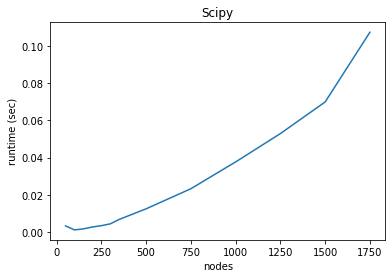

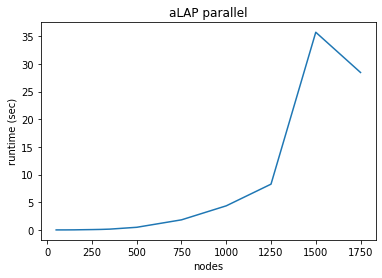

In [1495]:
#n = [10, 50, 100, 250, 500]
n = [50, 100, 150, 200, 250, 300, 350,500,750, 1000, 1250, 1500, 1750] 
     #2000, 2250, 2500, 2750, 3000]
scipy = np.zeros((len(n), 2))
alap = np.zeros((len(n), 2))
m = 5
for i, node in enumerate(n):
    for j in range(m):
        A = dense_matrix(node)
        start = time.time()
        M = linear_sum_assignment(-A)
        end = time.time()
        scipy[i,0] = scipy[i,0] + (end-start)
        scipy[i,1] = scipy[i,1] + A[M].sum()

        start = time.time()
        M = aLAP_ali(A)
        end = time.time()
        alap[i,0] = alap[i,0] + (end-start)
        alap[i,1] = alap[i,1] + A[M].sum()
    
    scipy[i,0] = scipy[i,0]/m
    alap[i,0] = alap[i,0]/m
    print(i)
plt.plot(n, scipy[:,0])
plt.xlabel('nodes')
plt.ylabel('runtime (sec)')
plt.title('Scipy')
figure()
plt.plot(n, alap[:,0])
plt.title('aLAP parallel')
plt.xlabel('nodes')
plt.ylabel('runtime (sec)')

Text(0.15, 0.8, 'R^2 = 0.8486925453761479')

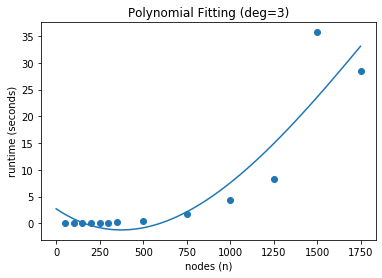

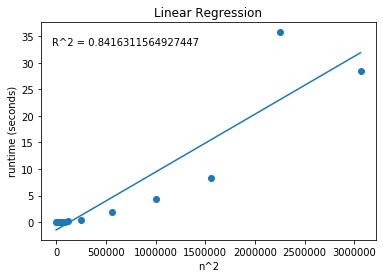

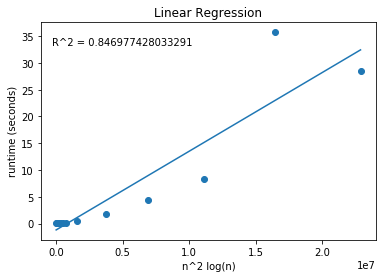

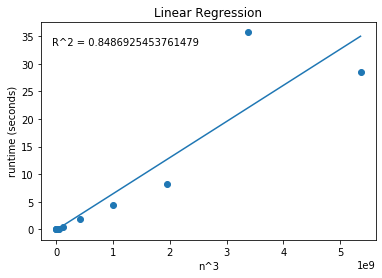

In [1496]:
from scipy.stats import linregress
plt.scatter(n, alap[:,0])
# coef = np.polyfit([i**2 for i in n], alap[:,0], 2)
coef = np.polyfit(n, alap[:,0], 3)
y_new = np.poly1d(coef)
plt.plot(np.linspace(0,max(n),100), y_new(np.linspace(0,max(n),100)))
plt.title("Polynomial Fitting (deg=3)")
plt.ylabel('runtime (seconds)')
plt.xlabel('nodes (n)')

plt.figure()
plt.scatter([(i**2) for i in n], alap[:,0])
# coef = np.polyfit([(i**2) for i in n], alap[:,0], 1)
# y_new = np.poly1d(coef)
res = linregress([i**2 for i in n], alap[:,0])
y_new = np.poly1d([res[0], res[1]])
m = np.max([(i**2) for i in n])
plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
plt.title("Linear Regression")
plt.ylabel('runtime (seconds)')
plt.xlabel('n^2')
plt.figtext(0.15,0.80, 'R^2 = '+ str(res[2]**2))

plt.figure()
plt.scatter([(i**2)*np.log(i) for i in n], alap[:,0])
res = linregress([(i**2)*np.log(i) for i in n], alap[:,0])
y_new = np.poly1d([res[0], res[1]])
m = np.max([(i**2)*np.log(i) for i in n])
plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
plt.title("Linear Regression")
plt.ylabel('runtime (seconds)')
plt.xlabel('n^2 log(n)')
plt.figtext(0.15,0.80, 'R^2 = '+ str(res[2]**2))

plt.figure()
plt.scatter([(i**3) for i in n], alap[:,0])
res = linregress([(i**3) for i in n], alap[:,0])
y_new = np.poly1d([res[0], res[1]])
m = np.max([(i**3) for i in n])
plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
plt.title("Linear Regression")
plt.ylabel('runtime (seconds)')
plt.xlabel('n^3')
plt.figtext(0.15,0.80, 'R^2 = '+ str(res[2]**2))

Text(0.15, 0.8, 'R^2 = 0.9924685988055933')

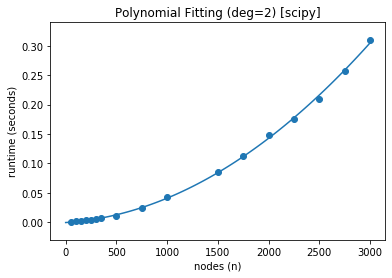

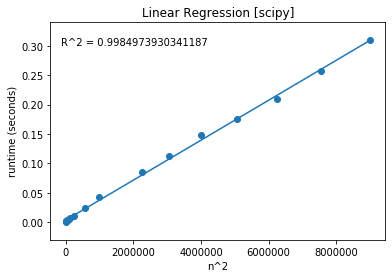

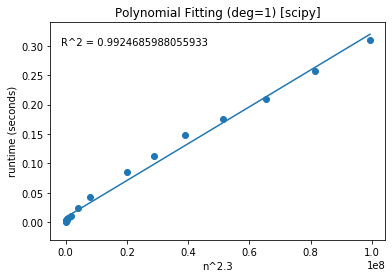

In [1494]:
from matplotlib.offsetbox import AnchoredText

plt.scatter(n, scipy[:,0])
# coef = np.polyfit([i**2 for i in n], alap[:,0], 2)
coef = np.polyfit(n, scipy[:,0], 2)
y_new = np.poly1d(coef)
plt.plot(np.linspace(0,max(n),100), y_new(np.linspace(0,max(n),100)))
plt.title("Polynomial Fitting (deg=2) [scipy]")
plt.ylabel('runtime (seconds)')
plt.xlabel('nodes (n)')

# plt.figure()
# plt.scatter([(i**2)*np.log(i) for i in n], scipy[:,0])
# coef = np.polyfit([(i**2)*np.log(i) for i in n], scipy[:,0], 1)
# y_new = np.poly1d(coef)
# m = np.max([(i**2)*np.log(i) for i in n])
# plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
# print(coef)

plt.figure()
plt.scatter([(i**2) for i in n], scipy[:,0])
# coef = np.polyfit([i**2 for i in n], scipy[:,0], 1)
# y_new = np.poly1d(coef)
res = linregress([i**2 for i in n], scipy[:,0])
y_new = np.poly1d([res[0], res[1]])
m = np.max([(i**2) for i in n])
plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
plt.title("Linear Regression [scipy]")
plt.ylabel('runtime (seconds)')
plt.xlabel('n^2')
plt.figtext(0.15,0.80, 'R^2 = '+ str(res[2]**2))

plt.figure()
plt.scatter([(i**2.3) for i in n], scipy[:,0])
res = linregress([i**2.3 for i in n], scipy[:,0])
y_new = np.poly1d([res[0], res[1]])
m = np.max([(i**2.3) for i in n])
plt.plot(np.linspace(0,m,100), y_new(np.linspace(0,m,100)))
plt.title("Polynomial Fitting (deg=1) [scipy]")
plt.ylabel('runtime (seconds)')
plt.xlabel('n^2.3')
plt.figtext(0.15,0.80, 'R^2 = '+ str(res[2]**2))


In [923]:
# generate random symmetric matrix, entries [0,100)
import random
def dense_matrix(num):
    matrix = np.zeros((num,num))
    for row in range(num):
        for col in range(num):
            matrix[row,col] = random.randrange(100)
    return matrix

print(dense_matrix(1000))
numpy.savetxt("densesym1000.csv", dense_matrix(1000), delimiter=",")

[[66.  5. 25. ... 71. 97.  5.]
 [75.  9. 39. ... 69. 63. 35.]
 [14. 44. 96. ... 76. 95.  7.]
 ...
 [27. 58. 30. ... 88.  7. 33.]
 [33. 54. 32. ... 48. 60. 12.]
 [54. 67. 91. ... 19. 85. 48.]]


In [1459]:
def sparse_matrix(n,m): # n = number of nodes, m = number of edges
    m = int(m)
    matrix = np.zeros((n,n))
    rows = random.sample(range(n), m)
    cols = random.sample(range(n), m)
    for i in range(m):
            matrix[rows[i],cols[i]] = random.randrange(100)
    return matrix
print(sparse_matrix(10, 10))

[[ 0.  0. 39.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 75.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 30.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  5.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 89.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 27.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 85.  0.  0.  0.]
 [ 0. 49.  0.  0.  0.  0.  0.  0.  0.  0.]
 [95.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Text(0, 0.5, 'runtime (sec)')

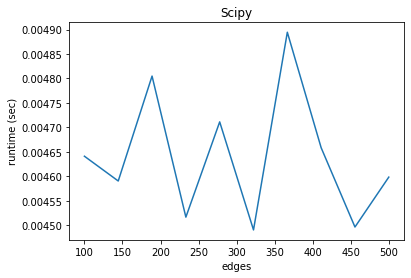

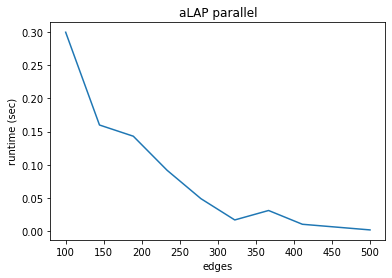

In [1462]:
nodes = 500
m = np.linspace(100,nodes,10)
scipy = np.zeros((len(m), 2))
alap = np.zeros((len(m), 2))
reps = 5
for i, ne in enumerate(m):
    for j in range(reps):
        A = sparse_matrix(nodes, ne)
        start = time.time()
        M = linear_sum_assignment(-A)
        end = time.time()
        scipy[i,0] = scipy[i,0] + (end-start)
        scipy[i,1] = scipy[i,1] + A[M].sum()

        start = time.time()
        M = parallel(A)
        end = time.time()
        alap[i,0] = alap[i,0] + (end-start)
        alap[i,1] = alap[i,1] + A[M].sum()
    
    scipy[i,0] = scipy[i,0]/reps
    alap[i,0] = alap[i,0]/reps
    #print(i)
plt.plot(m, scipy[:,0])
plt.xlabel('edges')
plt.ylabel('runtime (sec)')
plt.title('Scipy')
figure()
plt.plot(m, alap[:,0])
plt.title('aLAP parallel')
plt.xlabel('edges')
plt.ylabel('runtime (sec)')

Text(0.5, 1.0, 'aLAP parallel')

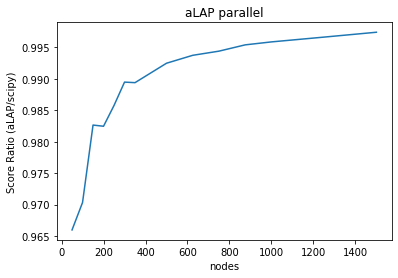

In [1452]:
score_ratio = [alap[i,1]/scipy[i,1] for i in range(len(n))]
plt.plot(n,score_ratio)
plt.xlabel('nodes')
plt.ylabel('Score Ratio (aLAP/scipy)')
plt.title('aLAP parallel')

# TESTING

In [1267]:
import numpy as np
import operator
from scipy.optimize import linear_sum_assignment, minimize_scalar, OptimizeResult


def quadratic_assignment_aLAP(
    cost_matrix,
    dist_matrix,
    seed=None,
    maximize=False,
    n_init=1,
    init="barycenter",
    maxiter=30,
    shuffle_input=True,
    eps=0.01,
):
    r"""
    Solve the quadratic assignment problem.

    This function solves the Quadratic Assignment Problem (QAP) and the
    Graph Matching Problem through an implementation of the Fast
    Approximate QAP Algorithm (FAQ) (these two problems are the same up
    to a sign change) [1]_.

    Quadratic Assignment solves problems of the following form:

    .. math::

        \min_P & \ {\ \text{trace}(APB^T P^T)}\\
        \mbox{s.t. } & {P \ \epsilon \ \mathcal{P}}\\

    where :math:`\mathcal{P}` is the set of all permutation matrices,
    and :math:`A` and :math:`B` are adjacency matrices.

    This algorithm can be thought of as finding an alignment of the
    vertices of two graphs which minimizes the number of induced edge
    disagreements, or, in the case of weighted graphs, the sum of squared
    differences of edge weight disagreements. The option to add seeds
    (known vertex correspondence between some nodes) is also available
    [2]_.

    Note that the quadratic assignment problem is NP-hard, is not
    known to be solvable in polynomial time, and is computationally
    intractable. Therefore, the results given are approximations,
    not guaranteed to be exact solutions.


    Parameters
    ----------
    cost_matrix : 2d-array, square, non-negative
        A square adjacency matrix. In this implementation, :math:`A` =
        `cost-matrix` in the objective function above.

    dist_matrix : 2d-array, square, non-negative
        A square adjacency matrix.  In this implementation, :math:`B` =
        `dist-matrix` in the objective function above.

    seed : 2d-array, optional, (default = None)
        Allows the user apply a seed, fixing part of the matching between
        the two adjacency matrices.
        For column 1, each entry is an index of a node in `cost_matrix`.
        For column 2, each entry is an index of a node in `dist_matrix`.
        The elements of ``seed[:, 0]`` and ``seed[:, 1]`` are vertices
        which are known to be matched, that is, ``seed[i, 0]`` is matched to
        vertex ``seed[i, 1]``. Array shape ``(m , 2)`` where ``m <= number of
        nodes``.

    maximize : bool (default = False)
        Gives users the option to solve the Graph Matching Problem (GMP)
        rather than QAP. This is accomplished through trivial negation
        of the objective function.


    options : dict, optional
        A dictionary of solver options. All methods accept the following
        options:

            n_init : int, positive (default = 1)
                Number of random initializations of the starting
                permutation matrix that the FAQ algorithm will undergo.
            init : string (default = 'barycenter') or 2d-array
                The algorithm may be sensitive to the initial permutation
                matrix (or search position) chosen due to the possibility
                of several local minima within the feasible region.
                With only 1 initialization, a barycenter init will
                likely return a more accurate permutation.

                Choosing several random initializations as opposed to
                the non-informative barycenter will likely result in a
                more accurate result at the cost of higher runtime.

                The initial position chosen:

                "barycenter" : the non-informative "flat doubly stochastic
                matrix," :math:`J=1*1^T /n` , i.e the barycenter of the
                feasible region (where :math:`n` is the number of nodes and
                :math:`1` is a ``(n, 1)`` array of ones).

                "rand" : some random point near :math:`J`, defined as
                :math:`(J+K)/2`, where :math:`K` is some random doubly
                stochastic matrix.

                If an ndarray is passed, it should have the same shape as
                `cost_matrix` and `dist_matrix`, and its rows and columns
                must sum to 1 (doubly stochastic).
            maxiter : int, positive (default = 30)
                Integer specifying the max number of Franke-Wolfe iterations.
                FAQ typically converges with modest number of iterations.
            shuffle_input : bool (default = True)
                To avoid artificially high or low matching due to inherent
                sorting of input adjacency matrices, gives users the option
                to shuffle the nodes of `cost_matrix`. Results are then
                unshuffled so that returned `col_ind` matches the node order
                of inputs.
            eps : float (default = 0.05)
                A positive, threshold stopping criteria such that Franke-
                Wolfe continues to iterate while Frobenius norm of
                :math:`(P_{i}-P_{i+1}) > eps`, where :math:`i` is the
                iteration number.

    Returns
    -------
    res : OptimizeResult
        A :class:`scipy.optimize.OptimizeResult` consisting of the fields:

            col_ind : 1-D array
                An array of column indices corresponding to the optimal
                permutation (with the fixed seeds given) of the
                nodes of `dist_matrix`, to best minimize the objective
                function.
            score : float
                The optimal value of the objective function.
            nit : int
                The total number of Franke-Wolfe iterations performed during
                optimization.

    References
    ----------
    .. [1] J.T. Vogelstein, J.M. Conroy, V. Lyzinski, L.J. Podrazik,
           S.G. Kratzer, E.T. Harley, D.E. Fishkind, R.J. Vogelstein, and
           C.E. Priebe, "Fast approximate quadratic programming for graph
           matching," PLOS one, vol. 10, no. 4, p. e0121002, 2015.

    .. [2] D. Fishkind, S. Adali, H. Patsolic, L. Meng, D. Singh, V. Lyzinski,
           C. Priebe, "Seeded graph matching", Pattern Recognit. 87 (2019):
           203-215.

    Examples
    --------

    >>> cost = np.array([[0, 80, 150, 170], [80, 0, 130, 100],
    ...         [150, 130, 0, 120], [170, 100, 120, 0]])
    >>> dist = np.array([[0, 5, 2, 7], [0, 0, 3, 8],
    ...         [0, 0, 0, 3], [0, 0, 0, 0]])
    >>> from scipy.optimize import quadratic_assignment
    >>> res = quadratic_assignment(cost, dist)
    >>> print(res)
     col_ind: array([0, 3, 2, 1])
         nit: 9
       score: 3260

    To demonstrate explicitly how the `score` value
    :math:`f(P) = trace(A^T PBP^T )` is calculated, one may construct the
    permutation matrix, and perform the necessary algebra.

    >>> n = cost.shape[0]
    >>> P = np.zeros((n, n))
    >>> P[np.arange(n), res['col_ind']] = 1
    >>> score = int(np.trace(cost.T @ P @ dist @ P.T))
    >>> print(score)
    3260

    As you can see, the value here matches res['score'] reported above.
    Alternatively, to avoid constructing the permutation matrix, one can also
    perform the following calculation.

    >>> score = np.trace(cost.T @ dist[np.ix_(res['col_ind'], res['col_ind'])])
    >>> print(score)
    3260

    Here, we are simply permuting the distance matrix.

    """

    cost_matrix = np.asarray(cost_matrix)
    dist_matrix = np.asarray(dist_matrix)

    if seed is None:
        seed = np.array([[], []]).T
    seed = np.asarray(seed)
    n_init = operator.index(n_init)
    maxiter = operator.index(maxiter)

    # ValueError check
    msg = None
    if cost_matrix.shape[0] != cost_matrix.shape[1]:
        msg = "'cost_matrix' must be square"
    elif dist_matrix.shape[0] != dist_matrix.shape[1]:
        msg = "'dist_matrix' must be square"
    elif cost_matrix.shape != dist_matrix.shape:
        msg = "Adjacency matrices must be of equal size"
    elif (cost_matrix < 0).any() or (dist_matrix < 0).any():
        msg = "Adjacency matrix contains negative entries"
    elif seed.shape[0] > cost_matrix.shape[0]:
        msg = "There cannot be more seeds than there are nodes"
    elif seed.shape[1] != 2:
        msg = "Seed array entry must have two columns"
    elif (seed < 0).any():
        msg = "Seed array contains negative entries"
    elif (seed >= len(cost_matrix)).any():
        msg = "Seed array entries must be less than the number of nodes"
    elif not len(set(seed[:, 0])) == len(seed[:, 0]) or not \
            len(set(seed[:, 1])) == len(seed[:, 1]):
        msg = "Seed column entries must be unique"
    elif isinstance(init, str) and init not in {'barycenter', 'rand'}:
        msg = "Invalid 'init_method' parameter string"
    elif n_init <= 0:
        msg = "'n_init' must be a positive integer"
    elif maxiter <= 0:
        msg = "'maxiter' must be a positive integer"
    if msg is not None:
        raise ValueError(msg)

    # TypeError check
    if type(shuffle_input) is not bool:
        msg = "'shuffle_input' must be a boolean"
    elif eps <= 0 or type(eps) is not float:
        msg = "'eps' must be a positive float"
    elif type(maximize) is not bool:
        msg = "'maximize' must be a boolean"
    if msg is not None:
        raise TypeError(msg)

    rng = np.random.RandomState()
    n = cost_matrix.shape[0]  # number of vertices in graphs
    n_seeds = seed.shape[0]  # number of seeds
    n_unseed = n - n_seeds

    perm_inds = np.zeros(n)

    obj_func_scalar = 1
    if maximize:
        obj_func_scalar = -1
    score = obj_func_scalar * np.inf

    seed_dist_c = np.setdiff1d(range(n), seed[:, 1])
    if shuffle_input:
        seed_dist_c = rng.permutation(seed_dist_c)
        # shuffle_input to avoid results from inputs that were already matched

    seed_cost_c = np.setdiff1d(range(n), seed[:, 0])
    permutation_cost = np.concatenate([seed[:, 0],
                                       seed_cost_c], axis=None).astype(int)
    permutation_dist = np.concatenate([seed[:, 1],
                                       seed_dist_c], axis=None).astype(int)
    cost_matrix = cost_matrix[np.ix_(permutation_cost, permutation_cost)]
    dist_matrix = dist_matrix[np.ix_(permutation_dist, permutation_dist)]

    # definitions according to Seeded Graph Matching [2].
    A11 = cost_matrix[:n_seeds, :n_seeds]
    A12 = cost_matrix[:n_seeds, n_seeds:]
    A21 = cost_matrix[n_seeds:, :n_seeds]
    A22 = cost_matrix[n_seeds:, n_seeds:]
    B11 = dist_matrix[:n_seeds, :n_seeds]
    B12 = dist_matrix[:n_seeds, n_seeds:]
    B21 = dist_matrix[n_seeds:, :n_seeds]
    B22 = dist_matrix[n_seeds:, n_seeds:]

    for i in range(n_init):
        # setting initialization matrix
        if isinstance(init, str) and init == "rand":
            # generate a nxn matrix where each entry is a random integer [0, 1]
            K = rng.rand(n_unseed, n_unseed)
            # perform 10 iterations of Sinkhorn balancing
            for i in range(10):
                K = _doubly_stochastic(K)
            # initialize J, a doubly stochastic barycenter
            J = np.ones((n_unseed, n_unseed)) / float(n_unseed)
            P = (K + J) / 2
        elif isinstance(init, str) and init == "barycenter":
            P = np.ones((n_unseed, n_unseed)) / float(n_unseed)
        else:
            _check_init_input(init, n)
            P = init
        const_sum = A21 @ B21.T + A12.T @ B12
        grad_P = np.inf  # gradient of P
        n_iter = 0  # number of FW iterations

        # OPTIMIZATION WHILE LOOP BEGINS
        while grad_P > eps and n_iter < maxiter:
            #print(n_iter)
            # computing the gradient of f(P) = -tr(APB^tP^t)
            delta_f = (const_sum + A22 @ P @ B22.T + A22.T @ P @ B22)
            # run hungarian algorithm on gradient(f(P))
            rows, cols = parallel(delta_f, maximize)
            Q = np.zeros((n_unseed, n_unseed))
            Q[rows, cols] = 1  # initialize search direction matrix Q

            def f(x):  # computing the original optimization function
                return obj_func_scalar * (
                    np.trace(A11.T @ B11)
                    + np.trace(np.transpose(x * P + (1 - x) * Q) @ A21 @ B21.T)
                    + np.trace(np.transpose(x * P + (1 - x) * Q) @ A12.T @ B12)
                    + np.trace(
                        A22.T
                        @ (x * P + (1 - x) * Q)
                        @ B22
                        @ np.transpose(x * P + (1 - x) * Q)
                    )
                )

            alpha = minimize_scalar(
                f, bounds=(0, 1), method="bounded"
            ).x  # computing the step size
            P_i1 = alpha * P + (1 - alpha) * Q  # Update P
            grad_P = np.linalg.norm(P - P_i1)
            P = P_i1
            n_iter += 1
        # end of FW optimization loop

        row, col = linear_sum_assignment(
            -P
        )  # Project onto the set of permutation matrices
        perm_inds_new = np.concatenate(
            (np.arange(n_seeds), np.array([x + n_seeds for x in col]))
        ).astype(int)

        score_new = np.trace(
            np.transpose(cost_matrix)
            @ dist_matrix[np.ix_(perm_inds_new, perm_inds_new)]
        )  # computing objective function value

        if obj_func_scalar * score_new < obj_func_scalar * score:  # minimizing
            score = score_new
            perm_inds = np.zeros(n, dtype=int)
            perm_inds[permutation_cost] = permutation_dist[perm_inds_new]

    permutation_cost_inv = np.argsort(permutation_cost)
    cost_matrix = cost_matrix[
        np.ix_(permutation_cost_inv, permutation_cost_inv)
    ]
    permutation_dist_inv = np.argsort(permutation_dist)
    dist_matrix = dist_matrix[
        np.ix_(permutation_dist_inv, permutation_dist_inv)
    ]

    score = np.trace(
        np.transpose(cost_matrix) @ dist_matrix[np.ix_(perm_inds, perm_inds)]
    )

    res = {"col_ind": perm_inds, "score": score, "nit": n_iter}

    return OptimizeResult(res)


def _check_init_input(init, n):
    row_sum = np.round(np.sum(init, axis=0), decimals=3)
    col_sum = np.round(np.sum(init, axis=1), decimals=3)
    msg = None
    if init.shape != (n, n):
        msg = "`init` matrix must have same shape as A and B"
    elif (row_sum != 1.).any() or (col_sum != 1.).any() or (init < 0).any():
        msg = "`init` matrix must be doubly stochastic"
    if msg is not None:
        raise ValueError(msg)


In [438]:
from graspy.simulations import sbm_corr
n = 90
rho = 1.0
ratio = 0
n_per_block = 30
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )
node_shuffle_input = np.random.permutation(n)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n))
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

start = time.time()
res = quadratic_assignment_aLAP(A1, A2_shuffle, maximize=True)
end = time.time()
ratio = match_ratio(res['col_ind'],node_unshuffle_input)



/Users/asaadeldin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: name 'match_ratio' is not defined

In [54]:
def match_ratio(v, w):
    return 1 - (np.count_nonzero(v - w) / n)

In [328]:
ratio
res['score']

1770.0

In [459]:
%pylab inline
import sys
sys.path
sys.path.insert(0, '/Users/asaadeldin/Downloads/GitHub/scipy')



Populating the interactive namespace from numpy and matplotlib


/Users/asaadeldin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ma', 'mat', 'random', 'matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [460]:
from scipy.optimize import quadratic_assignment

ImportError: cannot import name 'quadratic_assignment' from 'scipy.optimize' (/Users/asaadeldin/anaconda3/lib/python3.7/site-packages/scipy/optimize/__init__.py)

In [329]:
from graspy.simulations import sbm_corr
n = 90
rho = 1.0
ratio = 0
n_per_block = 30
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )
node_shuffle_input = np.random.permutation(n)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n))
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

start = time.time()
res = quadratic_assignment(A1, A2_shuffle, maximize=True)
end = time.time()
ratio = match_ratio(res['col_ind'],node_unshuffle_input)

In [330]:
ratio
res['score']

3668.0

In [30]:
end-start

0.3185300827026367

In [1280]:
qapprob ='chr12c'
A = datafile[qapprob][0]
B = datafile[qapprob][1]
start = time.time()
#print(quadratic_assignment(A,B))
end = time.time()
print(end-start)

2.7894973754882812e-05


In [1353]:
start = time.time()
res=quadratic_assignment_aLAP(A,B, eps = 0.00001)
end = time.time()
print(end-start)
res

0.12138915061950684


 col_ind: array([ 3,  1,  5,  4,  2,  0, 10,  7,  9, 11,  6,  8])
     nit: 30
   score: 51882

In [1279]:
res

 col_ind: array([ 2,  8,  4,  1,  0, 11, 10,  7,  9,  5,  6,  3])
     nit: 3
   score: 42818

In [392]:
import math
qapprob ='chr12a'
A = datafile[qapprob][1].astype(float)

#A[2,:] = -np.inf
#A[:,0] = -np.inf 
#(A != -np.inf).any()
A[2,:] = np.nan
#(A == -np.inf).all()
#all(A == NaN)

In [396]:
np.isnan(A).all()

False

In [793]:
x = [[0],[0,1],[0]]
x[0].append(1)
x[1].remove(1)
len(x)

3

In [639]:
x = np.array([[],[],[]])
x.shape

(3, 0)

In [947]:
x = np.arange(6)
i = np.array([1,3])
i in x

/Users/asaadeldin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [1021]:
temp = np.arange(6)
c = np.array([3,5,4,0,1,2])
t = (c[c] == temp)
m = np.empty(6) *np.nan
m[t] = c[t]
z, = np.nonzero(t)
np.isnan(m).any()

True

In [1050]:
x = np.arange(6)
for i, j in enumerate(x):
    print(i , ", " , j)


0 ,  0
1 ,  1
2 ,  2
3 ,  3
4 ,  4
5 ,  5


In [ ]:
for